This notebook peforms Villarubia's blind tip reconstruction from noise-free image data

## load required packages and test data

In [1]:
using Flux
using Flux.Data: DataLoader
using Plots
using BSON: @save, @load
using Statistics
using Revise, MDToolbox

In [2]:
@load "prepare_test_data.bson" width height resolution radius angle param models tip nx ny surfs images images_randn

## Blind-tip reconstruction from Image

In [3]:
nframe = 20

T = [0.1, 1.0, 10.0, 20.0, 40.0, 80.0]
P_array = []
loss_array = []

for t in T
    m_P = similar(tip)
    m_P .= 0.0

    itip_estimate!(m_P, images[1:nframe], thresh=t)

    loss = 0.0
    for image in images_randn[1:nframe]
        loss += mean((idilation(ierosion(image, m_P), m_P) .- image).^2)
    end
    loss = loss / length(images_randn[1:nframe])
        
    push!(P_array, m_P)
    push!(loss_array, loss)
end

Processed 20 image
71 refinements 
Processed 20 image
68 refinements 
Processed 20 image
71 refinements 
Processed 20 image
65 refinements 
Processed 20 image
42 refinements 
Processed 20 image
13 refinements 


In [4]:
gr()

Plots.GRBackend()

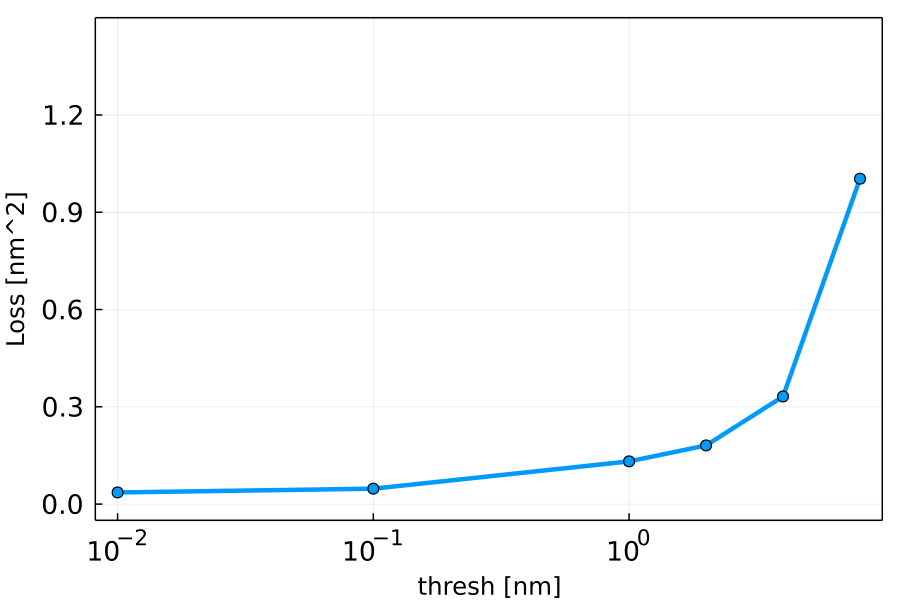

In [5]:
plot(T / 10.0, loss_array / 100.0, xaxis=:log, framestyle = :box, xlabel="threshold T", ylabel="loss [nm^2]", label=nothing, linewidth=3.0, markershape=:circle, dpi=150, fmt=:png, color=1,
     xtickfontsize=12, ytickfontsize=12, legendfontsize=12)

ylims!(-0.05, 1.5)
xlabel!("thresh [nm]", fontsize=35)
p = ylabel!("Loss [nm^2]", fontsize=35)

In [6]:
savefig(p, "blindtip_original01.png")

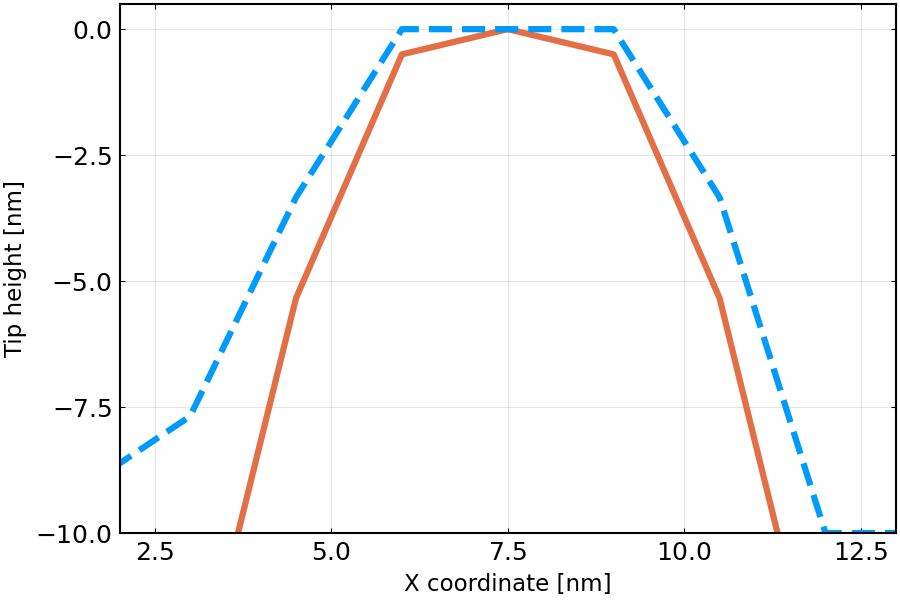

In [29]:
it = 4
islice = 5

plot(collect(1:nx) .* resolution / 10.0, tip[islice, :] / 10.0, linewidth=3, label="ground truth", color=2,
     xtickfontsize=12, ytickfontsize=12, legendfontsize=12)
p = plot!(collect(1:nx) .* resolution / 10.0, P_array[it][islice, :] / 10.0, linewidth=3, label="reconstruction", color=1, framestyle = :box, linestyle=:dash, dpi=150, fmt=:png, legend=nothing)

ylims!((-10, 0.5))
xlims!((2, 13))
xlabel!("X coordinate [nm]", fontsize=35)
ylabel!("Tip height [nm]", fontsize=35)

In [8]:
savefig(p, "blindtip_original02.png")

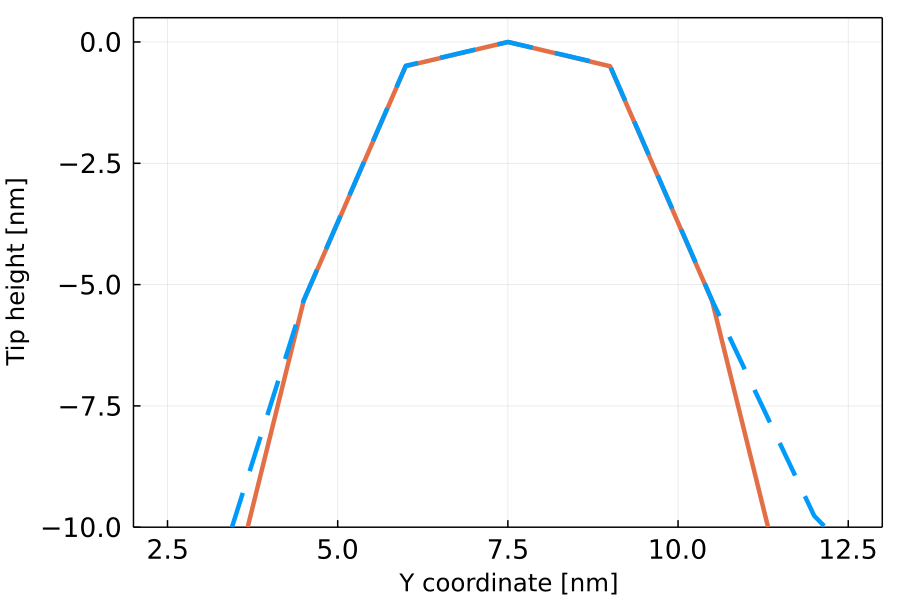

In [9]:
it = 1
islice = 5

plot(collect(1:ny) .* resolution / 10.0, tip[:, islice] / 10.0, linewidth=3, label="ground truth", color=2,
     xtickfontsize=12, ytickfontsize=12, legendfontsize=12)
p = plot!(collect(1:ny) .* resolution / 10.0, P_array[it][:, islice] / 10.0, linewidth=3, color=1, label="reconstruction", framestyle = :box, linestyle=:dash, dpi=150, fmt=:png, legend=nothing)
ylims!((-10, 0.5))
xlims!((2, 13))
xlabel!("Y coordinate [nm]", fontsize=35)
ylabel!("Tip height [nm]", fontsize=35)

In [10]:
savefig(p, "blindtip_original03.png")

In [11]:
pyplot()

Plots.PyPlotBackend()

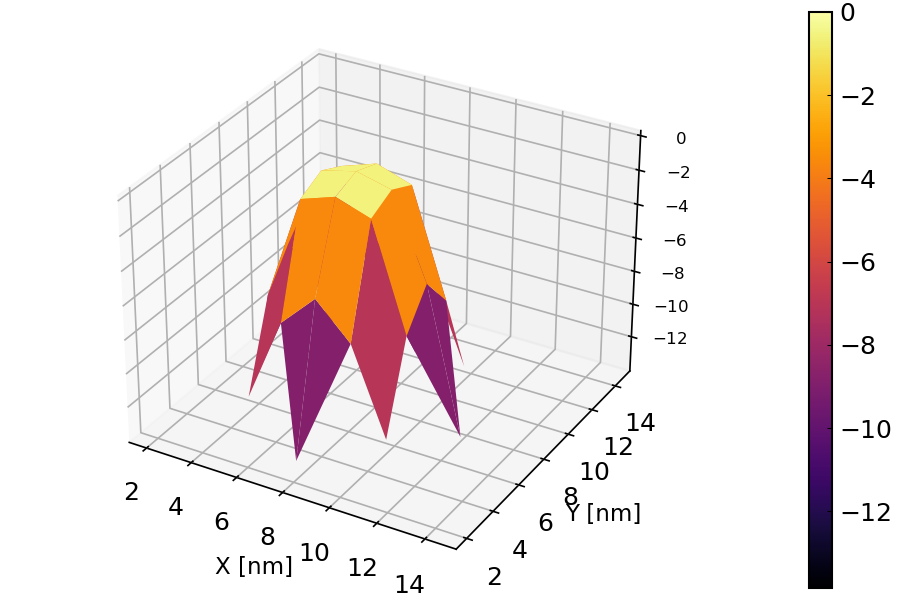

In [12]:
tip_tmp = deepcopy(tip)
tip_tmp[tip .< -150.0] .= NaN

plot(collect(1:nx) .* resolution ./ 10.0, collect(1:ny) .* resolution ./ 10.0, tip_tmp ./ 10.0, st=:surface, dpi=150,
     xtickfontsize=12, ytickfontsize=12, legendfontsize=12, colorbar_tickfontsize=12)
xlabel!("X [nm]", fontsize=35)
p = ylabel!("Y [nm]", fontsize=35)
#zlabel!("Z [nm]", fontsize=35)
#zlims!((-8, 0.5))
#zlabel!("Tip height [nm]", fontsize=35)

In [13]:
savefig(p, "blindtip_original04.png")

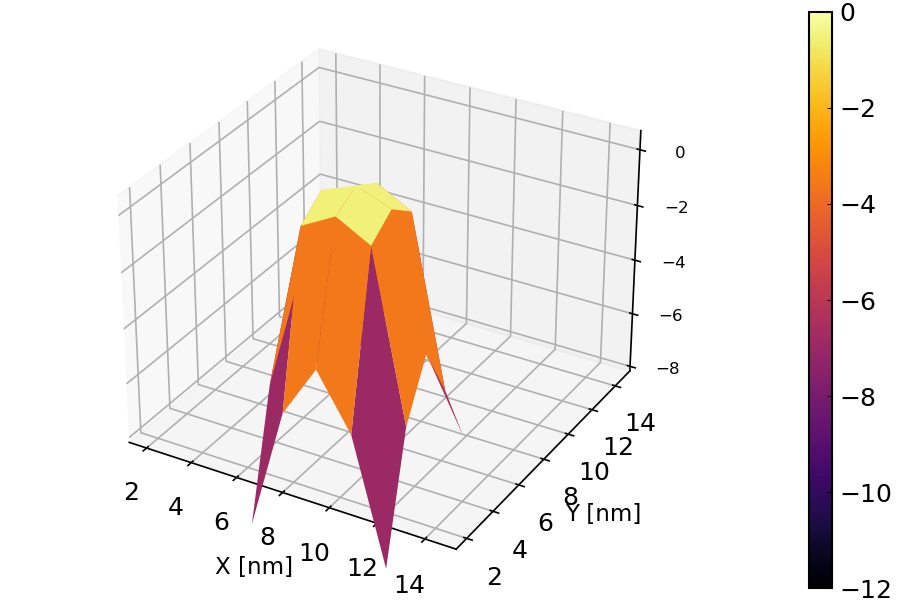

In [14]:
it = 1
tip_tmp = deepcopy(P_array[it])
tip_tmp[tip .< -130.0] .= NaN

plot(collect(1:nx) .* resolution ./ 10.0, collect(1:ny) .* resolution ./ 10.0, tip_tmp ./ 10.0, st=:surface, dpi=150, clim=(-12, 0),
     xtickfontsize=12, ytickfontsize=12, legendfontsize=12, colorbar_tickfontsize=12)
zlims!((-8, 0.5))
xlabel!("X [nm]", fontsize=35)
p = ylabel!("Y [nm]", fontsize=35)
#zlabel!("Tip height [nm]", fontsize=35)

In [15]:
savefig(p, "blindtip_original05.png")

In [16]:
gr()

Plots.GRBackend()

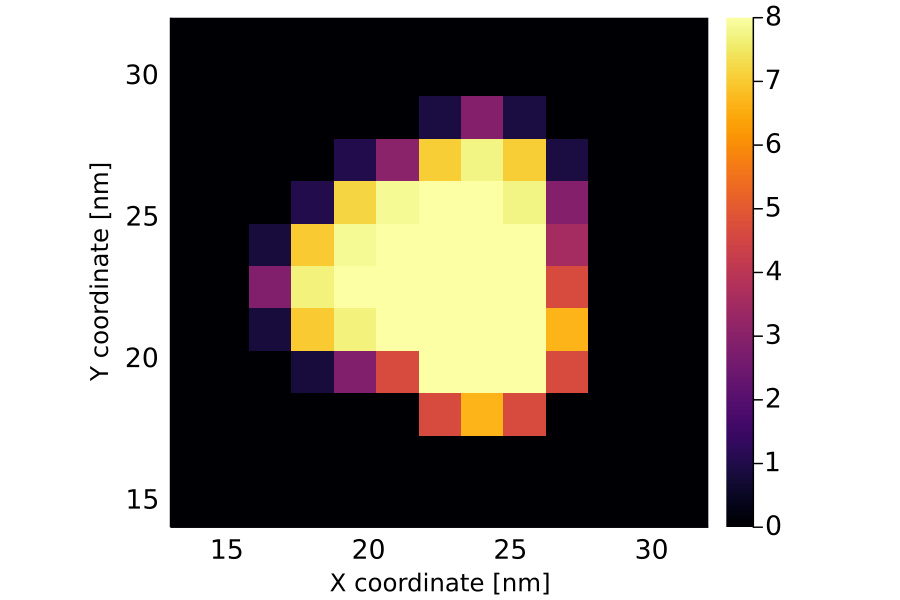

In [17]:
p = heatmap(collect(1:30) .* resolution / 10.0, collect(1:30) .* resolution / 10.0, images[1] / 10.0, clim=(0, 8), dpi=150, fmt=:png,
            aspect_ratio=:equal, xtickfontsize=12, ytickfontsize=12, legendfontsize=12, colorbar_tickfontsize=12)
xlabel!("X coordinate [nm]", fontsize=35)
xlabel!("X coordinate [nm]", fontsize=35)
ylabel!("Y coordinate [nm]", fontsize=35)
xlims!(13, 32)
ylims!(14, 32)

In [18]:
savefig(p, "blindtip_original06.png")

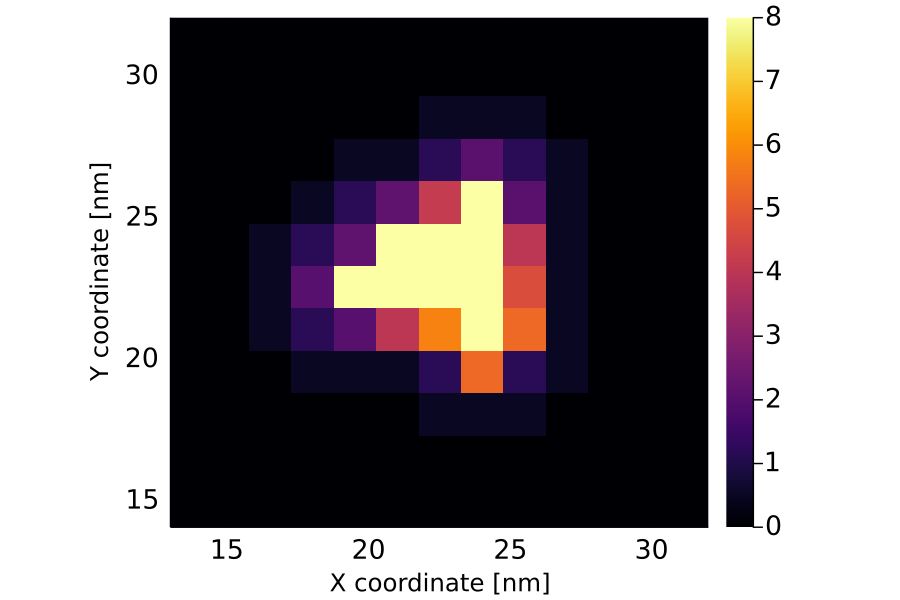

In [19]:
p = heatmap(collect(1:30) .* resolution / 10.0, collect(1:30) .* resolution / 10.0, ierosion(images[1], P_array[1]) / 10.0, clim=(0, 8), dpi=150, fmt=:png, aspect_ratio=:equal,
    xtickfontsize=12, ytickfontsize=12, legendfontsize=12, colorbar_tickfontsize=12)
xlabel!("X coordinate [nm]", fontsize=35)
ylabel!("Y coordinate [nm]", fontsize=35)
xlims!(13, 32)
ylims!(14, 32)

In [20]:
savefig(p, "blindtip_original07.png")

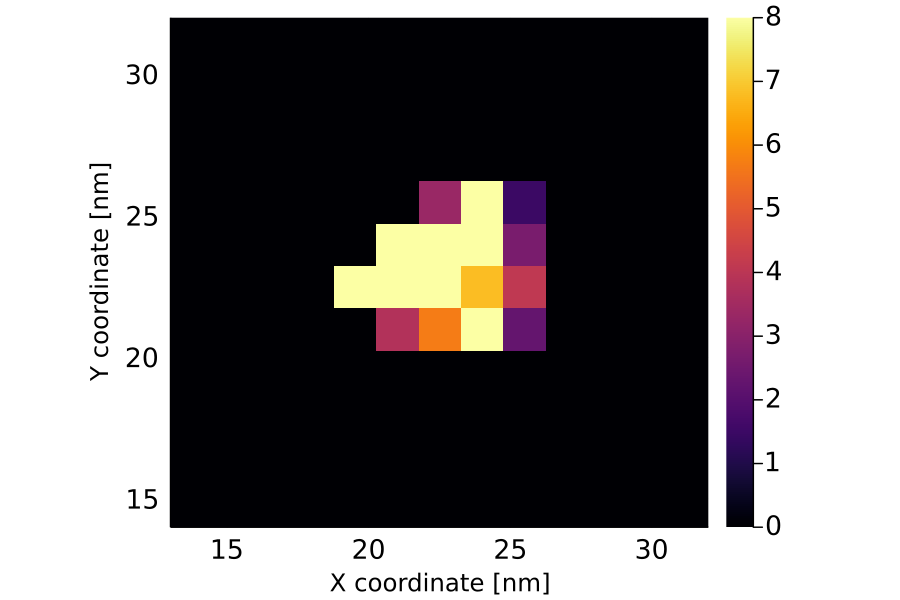

In [21]:
p = heatmap(collect(1:30) .* resolution / 10.0, collect(1:30) .* resolution / 10.0, surfs[1] / 10.0, clim=(0, 8), dpi=150, fmt=:png, aspect_ratio=:equal, 
            xtickfontsize=12, ytickfontsize=12, legendfontsize=12, colorbar_tickfontsize=12)
xlabel!("X coordinate [nm]", fontsize=35)
ylabel!("Y coordinate [nm]", fontsize=35)
xlims!(13, 32)
ylims!(14, 32)

In [22]:
savefig(p, "blindtip_original08.png")

# Pixel RMSD of reconstructed tip

In [23]:
function pixel_rmsd(image1, image2, ref; cutoff = -70.0)
    image1_shifted = similar(image1)

    rmsd_min = Inf64
    for du = -5:5, dv = -5:5
        image1_shifted = circshift(image1, (du, dv))
        #id = (image1_shifted .> cutoff) .| (image2 .> cutoff)
        id = ref .> cutoff
        tmp = sqrt(mean((image1_shifted[id] .- image2[id]).^2))
        if tmp < rmsd_min
            rmsd_min = tmp
        end
    end
    return rmsd_min
end

diff_tip = zeros(Float64, length(T), 2)
count = 0
for it = 1:length(T)
    c = pixel_rmsd(P_array[it], tip, tip)
    count += 1
    diff_tip[count, 1] = T[it]
    diff_tip[count, 2] = c
end

In [24]:
gr()

Plots.GRBackend()

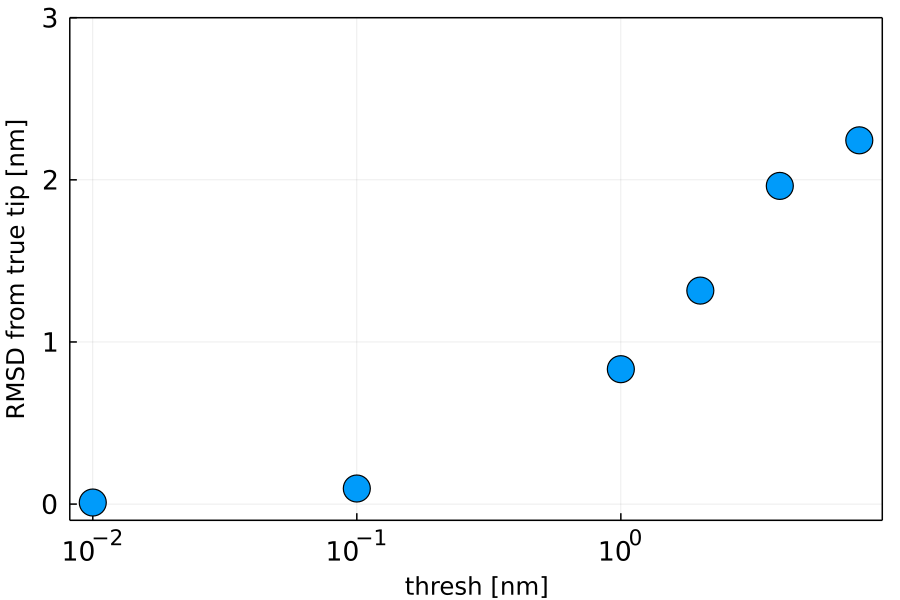

In [25]:
scatter(diff_tip[:, 1] / 10.0, diff_tip[:, 2] / 10.0, xaxis=:log, framestyle = :box, xlabel="threshold T", ylabel="RMSD frome true tip [nm]", label=nothing, linewidth=1.0, markershape=:circle, dpi=150, fmt=:png, color=1, 
        xtickfontsize=12, ytickfontsize=12, legendfontsize=12, colorbar_tickfontsize=12, markersize=10, markerstrokewidth=1)
#ylims!(-0.05, 2.3)
xlabel!("thresh [nm]", fontsize=35)
p = ylabel!("RMSD from true tip [nm]", fontsize=35)
ylims!(-0.1, 3)

# Pixel RMSD of reconstructed surface

In [26]:
diff_surf = zeros(Float64, length(T)*nframe, 2)
count = 0

for it = 1:length(T)
    for iframe = 1:nframe
        c = pixel_rmsd(ierosion(images[iframe], P_array[it]), surfs[iframe], images[iframe])
        count += 1
        diff_surf[count, 1] = T[it]
        diff_surf[count, 2] = c
    end
end

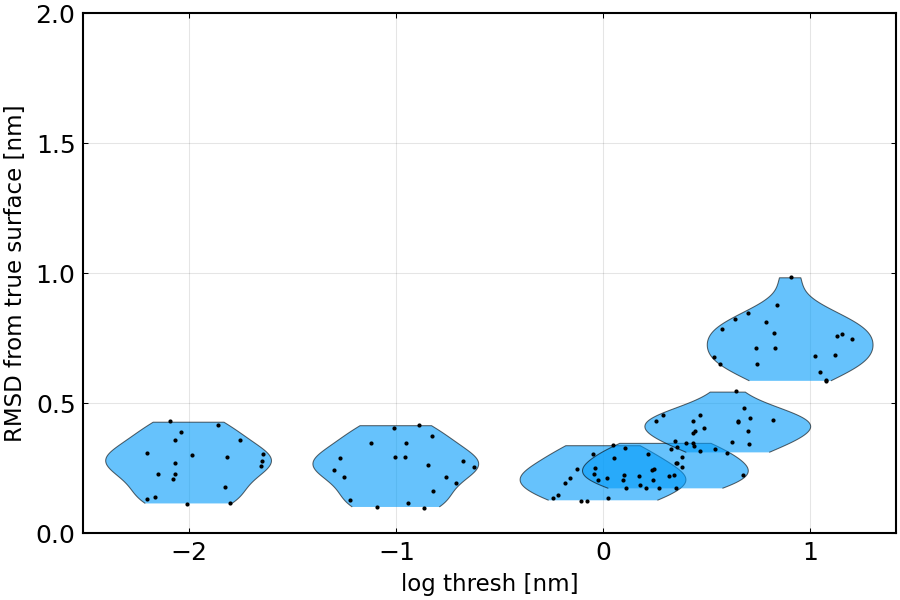

In [27]:
using StatsPlots
pyplot()

violin(log10.(diff_surf[:, 1] ./ 10.0), diff_surf[:, 2] ./ 10.0, ylim=(-0.1, 4.5),
       xtickfontsize=12, ytickfontsize=12, legendfontsize=12, 
       xlabel="log thresh [nm]", ylabel="RMSD from true surface [nm]", 
       framestyle=:box, label=nothing, linewidth=0.5, dpi=150, fmt=:png, alpha=0.6, color=1)

dotplot!(log10.(diff_surf[:, 1] ./ 10.0), diff_surf[:, 2] / 10.0, marker=(:black, stroke(0)), markersize=2.0, mode = :density, label=nothing)

ylims!(-0.0, 2)

# Save results

In [28]:
using BSON: @save, @load

@save "blindtip_original.bson" tip images nframe T P_array diff_tip diff_surf 